In [67]:
from pyspark.sql import SparkSession
from pyspark.sql.types import * 
from pyspark.sql.functions import *
from pyspark.ml.feature import NGram
import pandas
import matplotlib.pyplot as plt

Configura o Spark, Rodando um servidor pelo WSL, tanto para o Spark, quanto para o Jupyter-Notebook


In [2]:
spark = SparkSession.builder.appName("MapReduce tweets").getOrCreate()

22/12/06 21:42:59 WARN Utils: Your hostname, DESKTOP-UKKGOCL resolves to a loopback address: 127.0.1.1; using 172.18.63.131 instead (on interface eth0)
22/12/06 21:42:59 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/06 21:43:01 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
data = [("Java", "20000"), ("Python", "100000"), ("Scala", "3000")]
df = spark.createDataFrame(data)
df.show()

+------+------+
|    _1|    _2|
+------+------+
|  Java| 20000|
|Python|100000|
| Scala|  3000|
+------+------+



In [4]:
schema = StructType() \
      .add("tweet_id",LongType(),True) \
      .add("content",StringType(),True) \
      .add("coordinate_0",DoubleType(),True) \
      .add("coordiante_1",DoubleType(),True) \
      .add("retweeted",StringType(),True) \
      .add("tweet_id2",LongType(),True) \
      .add("tweet_id_str",StringType(),True) \
      .add("created_at",StringType(),True) \
      .add("created_at_str",StringType(),True) \
      .add("in_reply_to_user_id",StringType(),True) \
      .add("lang",StringType(),True) \
      .add("place_name",StringType(),True) \
      .add("place_id",StringType(),True) \
      .add("place_bb_00",StringType(),True) \
      .add("place_bb_01",StringType(),True) \
      .add("place_bb_10",StringType(),True) \
      .add("place_bb_11",StringType(),True) \
      .add("place_bb_20",StringType(),True) \
      .add("place_bb_21",StringType(),True) \
      .add("place_bb_30",StringType(),True) \
      .add("place_bb_31",StringType(),True) \
      .add("place_type",StringType(),True) \
      .add("place_country_code",StringType(),True) \
      .add("place_country",StringType(),True) \
      .add("place_full_name",StringType(),True) \
      .add("user_name",StringType(),True) \
      .add("user_id",StringType(),True) \
      .add("user_id_str",StringType(),True) \
      .add("user_location",StringType(),True) \
      .add("user_friend_count",StringType(),True) \
      .add("user_created_at",StringType(),True) \
      .add("user_screen_name",StringType(),True) 

In [5]:
debate_tweets = spark.read.csv("debate-tweets.tsv",sep=r'\t',schema=schema)

Nomeia as colunas baseados no readme http://lia.ufc.br/~igobrilhante/twitter-home/


Df vai ser o arquivo com o dataframe base

In [6]:
debate_tweets

DataFrame[tweet_id: bigint, content: string, coordinate_0: double, coordiante_1: double, retweeted: string, tweet_id2: bigint, tweet_id_str: string, created_at: string, created_at_str: string, in_reply_to_user_id: string, lang: string, place_name: string, place_id: string, place_bb_00: string, place_bb_01: string, place_bb_10: string, place_bb_11: string, place_bb_20: string, place_bb_21: string, place_bb_30: string, place_bb_31: string, place_type: string, place_country_code: string, place_country: string, place_full_name: string, user_name: string, user_id: string, user_id_str: string, user_location: string, user_friend_count: string, user_created_at: string, user_screen_name: string]

In [7]:
debate_tweets.count()

7228127

In [8]:
debate_tweets.limit(10).toPandas()

22/12/06 21:43:14 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,tweet_id,content,coordinate_0,coordiante_1,retweeted,tweet_id2,tweet_id_str,created_at,created_at_str,in_reply_to_user_id,...,place_country_code,place_country,place_full_name,user_name,user_id,user_id_str,user_location,user_friend_count,user_created_at,user_screen_name
0,522394422710136832,"@anacddd verdade, olha o site",-27.516566,-48.646082,False,522394422710136832,522394422710136832,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,303425830,...,None,None,None,Geovana Nunes,295414968,295414968,None,316,Mon May 09 00:12:02 +0000 2011,geovanannunes
1,522394422806581248,Que ñ*,-27.768328,-51.668323,False,522394422806581248,522394422806581248,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Rosane Fernandes,2409363642,2409363642,Cacique Doble RS,47,Mon Mar 24 18:06:40 +0000 2014,Rosane_fsf
2,522394422731100160,Vou quebrar a Bruna,-27.004640,-48.623519,False,522394422731100160,522394422731100160,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Bebel,162447082,162447082,None,513,Sat Jul 03 18:03:35 +0000 2010,_isarenata
3,522394422810783745,agora vou p segundo andar e depois p 3° 👏,-15.852082,-47.961413,False,522394422810783745,522394422810783745,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,tatá,387694391,387694391,None,347,Sun Oct 09 14:19:52 +0000 2011,thayflausino
4,522394423137943553,Me sinto tão bem - Mika #QueroNoTVZ,-3.755046,-38.566769,False,522394423137943553,522394423137943553,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Simone ♥ DDM's ♥,152792963,152792963,Fortaleza/Ceará,719,Sun Jun 06 22:15:22 +0000 2010,simoneesilva
5,522394423188271104,"Eu estou aqui, deixando a vida me guiar, não é...",-22.846869,-43.308830,False,522394423188271104,522394423188271104,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Gar6,749780077,749780077,Rio de Janeiro,356,Fri Aug 10 17:56:10 +0000 2012,juliagar6
6,522394423238606848,Quando vai embora tudo fica sem graça,-22.904301,-43.544403,False,522394423238606848,522394423238606848,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,Isa,2476253858,2476253858,None,164,Sun May 04 02:22:02 +0000 2014,isabelleecorrea
7,522394423528022016,@paynecaralhudo kkkkkk n n sou legal kkk,-23.509058,-46.968920,False,522394423528022016,522394423528022016,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,518826601,...,None,None,None,Júlio Lessa ✌,324937648,324937648,None,943,Mon Jun 27 13:28:08 +0000 2011,SiempreCtgLS
8,522394423632875521,Conceição da Barra acho que vou pra outro dia,-18.713338,-40.405779,False,522394423632875521,522394423632875521,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,None,...,None,None,None,♔Lu♔,536501962,536501962,Nova Venécia-Es,82,Sun Mar 25 17:45:22 +0000 2012,Hey_Marrenta
9,522394424010362881,@Maniavato te amo ♥,-23.064705,-45.717173,False,522394424010362881,522394424010362881,Wed Oct 15 14:31:50 +0000 2014,2014-10-15,542665678,...,None,None,None,queen,1414028317,1414028317,| no puteiro com a Ju. |,1911,Wed May 08 22:50:20 +0000 2013,ButeraCertified


Conferida se os nomes e tipos das colunas estão corretos, partimos para a primeira questão

In [9]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY") 
hashtag_regex="^#\w+|\s#\w+"
debate_tweets_timestamp=debate_tweets.withColumn("timestamp",to_timestamp('created_at', 'EEE LLL d HH:mm:ss z yyyy'))
debate_filtrado1=debate_tweets_timestamp.select('content','created_at',"timestamp")

1)Quais foram as hashtags mais usadas pela manhã, tarde e noite? (1,0 ponto)

Como só vamos precisar da coluna content, e created_at, limpo as outras colunas

In [10]:
contains_hashtag=debate_filtrado1.filter(debate_filtrado1["content"].rlike(hashtag_regex)).withColumn("hashtag",regexp_extract("content",hashtag_regex,0))\
.withColumn("hour",hour("timestamp"))

In [11]:
contains_hashtag_manha=contains_hashtag.filter(contains_hashtag["hour"]>=6).filter(contains_hashtag["hour"]<13);
contains_hashtag_tarde=contains_hashtag.filter(contains_hashtag["hour"]>=13).filter(contains_hashtag["hour"]<18);
contains_hashtag_noite=contains_hashtag.filter(contains_hashtag["hour"]>=18).union(contains_hashtag.filter(contains_hashtag["hour"]<6));

In [12]:
contains_hashtag_manha.count()
contains_hashtag_tarde.count()
contains_hashtag_noite.count()

495260

In [13]:
contains_hashtag_manha.groupBy("hashtag").count().sort('count', ascending=False).limit(50).toPandas()

,hashtag,count
0,#EMABiggestFans1D,37297
1,#EMABiggestFansJustinBieber,32625
2,#EMABiggestFansJustinBieber,3807
3,#EMABiggestFans1D,3083
4,#QueroNoTVZ,2645
5,#QueroNoTVZ,1537
6,#VoteVampsTeenAwards,976
7,#AustinMahone,768
8,#AUSTINMAHONE,733
9,#trndnl,566


In [14]:
contains_hashtag_tarde.groupBy("hashtag").count().sort('count', ascending=False).limit(50).toPandas()

,hashtag,count
0,#EMABiggestFans1D,47300
1,#EMABiggestFansJustinBieber,41537
2,#StealMyGirl,5896
3,#EMABiggestFansJustinBieber,4858
4,#EMABiggestFans1D,4040
5,#bigpaynodanceoff,3648
6,#LuanSantanaNaHoraDoFaro,1970
7,#CartersNewVideo,1679
8,#FlyNoMixDiario,1141
9,#demiyourstorydoesntdefineyou,976


In [15]:
contains_hashtag_noite.groupBy("hashtag").count().sort('count', ascending=False).limit(50).toPandas()

,hashtag,count
0,#EMABiggestFansJustinBieber,105331
1,#EMABiggestFans1D,104991
2,#EMABiggestFansJustinBieber,14208
3,#camilasayshi,9024
4,#EMABiggestFans1D,8589
5,#TheVoiceBrasil,2315
6,#DebateNoSBT,2229
7,#E,2045
8,#Vote5HEMA,1968
9,#AssistamODR,1953


b) Quais as hashtags mais usadas em cada dia? (1,0 ponto)

In [16]:
withday=debate_tweets_timestamp.filter(debate_tweets_timestamp["content"].rlike(hashtag_regex))\
.withColumn("dayofmonth",dayofmonth("timestamp"))\
.withColumn("month",month("timestamp"))\
.withColumn("hashtag",regexp_extract("content",hashtag_regex,0)).select("dayofmonth","month","hashtag");


In [17]:
hashtag_by_day=withday.groupBy("dayofmonth","month","hashtag").count().sort('count', ascending=False)

In [18]:
hashtag_by_day.toPandas()

,dayofmonth,month,hashtag,count
0,16.0,10.0,#EMABiggestFans1D,58662
1,16.0,10.0,#EMABiggestFansJustinBieber,46097
2,15.0,10.0,#EMABiggestFans1D,43730
3,15.0,10.0,#EMABiggestFansJustinBieber,40738
4,17.0,10.0,#EMABiggestFans1D,32530
...,...,...,...,...
148789,20.0,10.0,#Tw10000,1
148790,20.0,10.0,#arisjerome,1
148791,20.0,10.0,#TeAmoooo,1
148792,20.0,10.0,#primogato,1


In [19]:
hashtag_by_day.dropDuplicates(["dayofmonth","month"]).toPandas()

,dayofmonth,month,hashtag,count
0,NaN,NaN,#SamsungNightRun5k,2
1,15.0,10.0,#EMABiggestFans1D,43730
2,16.0,10.0,#EMABiggestFans1D,58662
3,17.0,10.0,#EMABiggestFans1D,32530
4,18.0,10.0,#EMABiggestFansJustinBieber,27834
5,19.0,10.0,#EMABiggestFansJustinBieber,26850
6,20.0,10.0,#EMABiggestFansJustinBieber,6365


c) Qual o número de tweets por hora a cada dia? ((1,0 ponto))

In [20]:
withdayhour=debate_tweets_timestamp.filter(debate_tweets_timestamp["content"].rlike(hashtag_regex))\
.withColumn("dayofmonth",dayofmonth("timestamp"))\
.withColumn("month",month("timestamp"))\
.withColumn("hour",hour("timestamp"))\
.withColumn("hashtag",regexp_extract("content",hashtag_regex,0)).select("dayofmonth","month","hour","hashtag");

In [21]:
hashtag_by_day_hour=withdayhour.groupBy("dayofmonth","month","hour","hashtag").count().sort("count", ascending=False)

In [22]:
hashtag_by_day_hour.toPandas()

,dayofmonth,month,hour,hashtag,count
0,15.0,10.0,22.0,#EMABiggestFansJustinBieber,8738
1,15.0,10.0,22.0,#camilasayshi,8513
2,15.0,10.0,23.0,#EMABiggestFans1D,6731
3,16.0,10.0,22.0,#EMABiggestFansJustinBieber,6504
4,15.0,10.0,22.0,#EMABiggestFans1D,5994
...,...,...,...,...,...
208921,20.0,10.0,3.0,#NichoBello,1
208922,20.0,10.0,3.0,#Em_Algum_Lugar_Do_Mundo,1
208923,20.0,10.0,3.0,#RachelMcAdams,1
208924,20.0,10.0,4.0,#Facebook,1


In [23]:
hashtag_by_day_hour.dropDuplicates(["dayofmonth","month","hour"]).sort(["dayofmonth","month","hour"],ascending=False).toPandas()

,dayofmonth,month,hour,hashtag,count
0,20.0,10.0,5.0,#EMABiggestFansJustinBieber,107
1,20.0,10.0,4.0,#EMABiggestFansJustinBieber,288
2,20.0,10.0,3.0,#EMABiggestFansJustinBieber,677
3,20.0,10.0,2.0,#EMABiggestFansJustinBieber,889
4,20.0,10.0,1.0,#EMABiggestFansJustinBieber,2265
...,...,...,...,...,...
110,15.0,10.0,14.0,#EMABiggestFans1D,3457
111,15.0,10.0,13.0,#EMABiggestFans1D,2976
112,15.0,10.0,12.0,#EMABiggestFansJustinBieber,3769
113,15.0,10.0,11.0,#EMABiggestFans1D,1794


d) Quais as principais sentenças relacionadas à palavra “Dilma”? (1,0 ponto)

In [24]:
dilma_df=debate_tweets_timestamp.filter(lower(debate_tweets_timestamp["content"]).contains("dilma"))\
.groupBy("content").count().sort("count",ascending=False)

In [25]:
dilma_df.limit(50).toPandas()

,content,count
0,#QueroDilmaTreze,110
1,#MelhorcomDilma13,34
2,#MenosOdioMaisDilma,29
3,#VouComDilma13,24
4,#Dilma13,24
5,#dilmavaiperderaecio45vencer,24
6,#DilmaTheVodka,21
7,#QueroDilma13,15
8,#Dilma13PraVencer,13
9,Dilma 13,7


e) Quais as principais sentenças relacionadas à palavra “Aécio”? (1,0 ponto)

In [26]:
aecio_df=debate_tweets_timestamp.filter(lower(debate_tweets_timestamp["content"]).contains("aecio"))\
.union(debate_tweets_timestamp.filter(lower(debate_tweets_timestamp["content"]).contains("aécio")))\
.groupBy("content").count().sort("count",ascending=False)

In [27]:
aecio_df.limit(50).toPandas()

,content,count
0,#AecioEmTodoBrasil,54
1,#EmTodoBrasilAecio45,49
2,#dilmavaiperderaecio45vencer,24
3,#AecioPelaMudanca,22
4,#AgoraÉAecioBrasil,16
5,#Aecio45,16
6,#AgoraEAecioBrasil,16
7,#AecioNever,13
8,@AecioNeves #EmTodoBrasilAecio45,12
9,@AecioNeves,11


2)Dado um dataset com tweets relacionados à visita da Torre Eiffel em Paris, 
responda:

a) Encontre as palavras mais utilizadas nas avaliações. (1,0 ponto)

c) Encontre os principais tópicos relacionados às revisões. (1,0 ponto

d) Mapeie a distribuição temporal das revisões. (1,0 ponto)

In [28]:
df_eiffel_tower = spark.read.json("eiffel-tower-reviews.json")
df_eiffel_tower_timestamp=df_eiffel_tower.withColumn("timestamp",to_timestamp('createdAt', 'MMM d,yyyy'))

In [29]:
df_eiffel_tower_timestamp.toPandas()

/opt/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,_id,author,bubbleCount,collectedAt,createdAt,query,text,title,timestamp
0,"(5921cdae4b679c4646a52f57,)","(0, 0, Since this month, 0, 0, 2)",50,"(2017-05-21T17:26:06.452Z,)","May 20, 2017",Eiffel_Tower,This is the most busiest atttaction in Paris a...,Must do even it was so busy,2017-05-20
1,"(5921cdae4b679c4646a52f58,)","(10, 4, Since Aug 2015, 0, 23, 27)",50,"(2017-05-21T17:26:06.590Z,)","May 20, 2017",Eiffel_Tower,My significant other and I drunkenly stumbled ...,A Classic,2017-05-20
2,"(5921cdae4b679c4646a52f59,)","(9, 4, Since Nov 2015, 0, 0, 31)",50,"(2017-05-21T17:26:06.642Z,)","May 20, 2017",Eiffel_Tower,We had a tour to the Eiffel Tower while we wer...,Wet weather,2017-05-20
3,"(5921cdae4b679c4646a52f5a,)","(16, 5, Since Apr 2008, 0, 536, 37)",50,"(2017-05-21T17:26:06.721Z,)","May 20, 2017",Eiffel_Tower,Visited with my wife and son.,Not to be missed,2017-05-20
4,"(5921cdae4b679c4646a52f5b,)","(30, 6, Since Jan 2014, 0, 36, 181)",50,"(2017-05-21T17:26:06.757Z,)","May 20, 2017",Eiffel_Tower,We went in the night at 10pm to see the illumi...,Awesome!!!,2017-05-20
...,...,...,...,...,...,...,...,...,...
7174,"(59226b566af3a1312785d4f3,)","(0, 0, Since Jul 2015, 0, 0, 2)",30,"(2017-05-22T04:38:46.565Z,)","July 27, 2015",Eiffel_Tower,We recently visited the Eiffel Tower on our tr...,Tour me Eiffel,2015-07-27
7175,"(59226b566af3a1312785d4f4,)","(13, 4, Since May 2009, 0, 15, 31)",40,"(2017-05-22T04:38:46.712Z,)","July 27, 2015",Eiffel_Tower,Getting through the lines is impossible or at ...,Bucket list must see,2015-07-27
7176,"(59226b566af3a1312785d4f5,)","(47, 5, Since Oct 2010, 0, 1, 76)",50,"(2017-05-22T04:38:46.854Z,)","July 27, 2015",Eiffel_Tower,One must not be there to be served and one wil...,Crowded with awful staff. But who cares? It's ...,2015-07-27
7177,"(59226b566af3a1312785d4f6,)","(0, 2, Since Aug 2012, 0, 0, 6)",50,"(2017-05-22T04:38:46.947Z,)","July 27, 2015",Eiffel_Tower,Loved the Eiffel tower this was my 2nd visit a...,AMAZING,2015-07-27


a) Encontre as palavras mais utilizadas nas avaliações. (1,0 ponto

In [40]:
#connectives=[" ","a","if","the","as","is","we","it","he","she","to","and","you","but","on","of","in","was","i","for","at","not","so","are"]

word_count_eiffel=df_eiffel_tower_timestamp.withColumn("words",split('text', ' '))\
.withColumn('word', explode('words')).select("word").withColumn("word_lc",lower(col("word"))).select("word","word_lc")\
.groupBy("word_lc").count().orderBy("count",ascending=False).select("word_lc","count")

word_count_eiffel.limit(50).toPandas()

,word_lc,count
0,the,29512
1,to,14835
2,and,11161
3,a,9028
4,of,6998
5,it,6381
6,you,6007
7,in,5903
8,we,5778
9,is,5761


b) Encontre as expressões mais usadas. Considere uma expressão um conjunto 
de palavras na sequencia. O tamanho da sequencia pode ser determinado por 
você. (1,0 ponto)

In [61]:
#Usando NGRAM
parsed_phrases_ngram=df_eiffel_tower_timestamp.withColumn("sentences",sentences("text")).select("sentences")\
.withColumn("sentences_exploded",explode("sentences")).select("sentences_exploded")

ngram=NGram(n=5,inputCol="sentences_exploded", outputCol="ngrams")

parsed_phrases_ngram=ngram.transform(parsed_phrases_ngram).withColumn("phrases",explode("ngrams"))\
.groupBy("phrases").count().sort("count",ascending=False).select("phrases","count")
parsed_phrases_ngram.toPandas()

,phrases,count
0,to go to the top,183
1,all the way to the,136
2,to the top of the,126
3,the way to the top,125
4,the top of the tower,110
...,...,...
265068,NOT have to wait in,1
265069,hr queue for a ticket,1
265070,be there and feel it,1
265071,it again but it was,1


c) Encontre os principais tópicos relacionados às revisões. (1,0 ponto)

In [80]:
connectives=[" ","this","a","if","the","as","is","we","it","he","she","to","and","you","but","on","of","in","was","i","for","at","not","so","are"]

word_count_eiffel=df_eiffel_tower_timestamp.withColumn("words",split('text', ' '))\
.withColumn('word', explode('words')).select("word").withColumn("word_lc",lower(col("word"))).select("word","word_lc")\
.filter(~(col("word_lc")).isin(connectives))\
.groupBy("word_lc").count().orderBy("count",ascending=False).select("word_lc","count")

word_count_eiffel.limit(50).toPandas()

,word_lc,count
0,tower,4184
1,eiffel,3246
2,up,3074
3,go,2594
4,from,2504
5,there,2049
6,paris,1997
7,see,1973
8,be,1903
9,top,1876


d) Mapeie a distribuição temporal das revisões. (1,0 ponto)

In [70]:
temporal_distribution=df_eiffel_tower_timestamp.groupBy("timestamp").count().sort("timestamp").toPandas()

/opt/spark/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


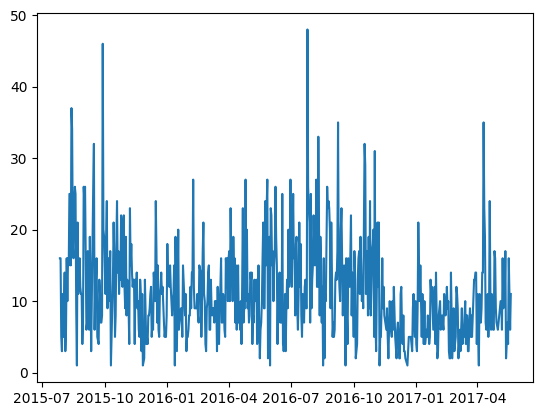

In [79]:

plt.plot(temporal_distribution["timestamp"], temporal_distribution["count"])